In [1]:
import pandas as pd
# 저희는 Tabular Data를 다루기 때문에 아래 라이브러리를 호출합니다.
from autogluon.tabular import TabularDataset, TabularPredictor


In [2]:
train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

In [3]:
train_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


## autogluon_02 ci_hour의 이상치 대체하기

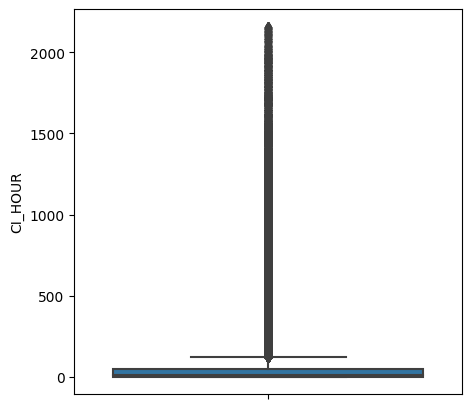

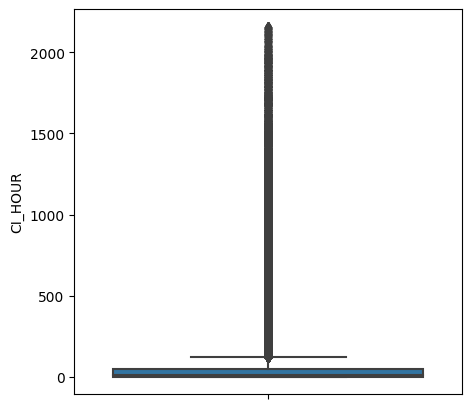

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot을 그리기 전에 현재 ci_hour의 분포를 확인합니다.
plt.figure(figsize=(5, 5))
sns.boxplot(data=train_df, y='CI_HOUR')



# 대체된 후의 Boxplot을 다시 그립니다.
plt.figure(figsize=(5, 5))
sns.boxplot(data=train_df, y='CI_HOUR')

# 그래프를 표시합니다.
plt.show()

Text(0, 0.5, 'Frequency')

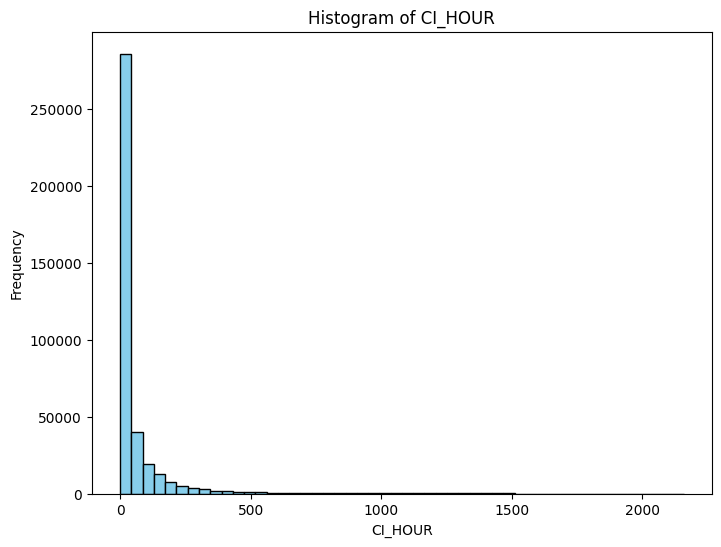

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(train_df['CI_HOUR'], bins=50, color='skyblue', edgecolor='black')  # bins는 구간의 개수를 조절합니다.

# 그래프 제목과 축 레이블을 추가합니다.
plt.title('Histogram of CI_HOUR')
plt.xlabel('CI_HOUR')
plt.ylabel('Frequency')

In [6]:
train = TabularDataset(train_df.drop(['SAMPLE_ID'], axis=1))
test = TabularDataset(test_df.drop(['SAMPLE_ID'], axis=1))

In [7]:
predictor = TabularPredictor(label='CI_HOUR', eval_metric='mae')
predictor.fit(train, num_cpus=10, ag_args_fit={'num_gpus': 1},presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20231021_111301/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231021_111301/"
AutoGluon Version:  0.8.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #147-Ubuntu SMP Fri Oct 14 17:07:22 UTC 2022
Disk Space Avail:   77366.46 GB / 89605.99 GB (86.3%)
Train Data Rows:    391939
Train Data Columns: 21
Label Column: CI_HOUR
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mea

In [8]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -43.460784     544.669533  13087.201606                0.005080           3.605487            3       True         22
1    NeuralNetTorch_BAG_L2 -43.477309     520.758078  12053.614104                4.531518        2578.720628            2       True         20
2      WeightedEnsemble_L2 -44.793505      22.921016   5397.491875                0.005004           4.542295            2       True         12
3    NeuralNetTorch_BAG_L1 -45.027340       2.681226   4921.775636                2.681226        4921.775636            1       True         10
4           XGBoost_BAG_L2 -46.378564     518.728369   9591.444684                2.501809         116.551208            2       True         19
5   NeuralNetFastAI_BAG_L2 -50.048308     521.097609  11873.444994  

/shared/home/sw_hdai/.local/lib/python3.8/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [9]:
ld_board = predictor.leaderboard(train, silent=False)

ld_board

TBB Warning: The number of workers is currently limited to 9. The request for 95 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



                     model  score_test  score_val  pred_time_test  pred_time_val      fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    KNeighborsDist_BAG_L1  -19.847146 -87.358843      205.510593     200.874691      0.207648               205.510593              200.874691           0.207648            1       True          2
1   RandomForestMSE_BAG_L1  -27.661269 -53.338352        5.160323      18.536229    372.520492                 5.160323               18.536229         372.520492            1       True          5
2     ExtraTreesMSE_BAG_L1  -31.487953 -53.407068        4.586349      16.676704     81.779759                 4.586349               16.676704          81.779759            1       True          7
3    NeuralNetTorch_BAG_L2  -34.251440 -43.477309      692.235021     520.758078  12053.614104                34.047510                4.531518        2578.720628            2       True         20
4      Wei

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-19.847146,-87.358843,205.510593,200.874691,0.207648,205.510593,200.874691,0.207648,1,True,2
1,RandomForestMSE_BAG_L1,-27.661269,-53.338352,5.160323,18.536229,372.520492,5.160323,18.536229,372.520492,1,True,5
2,ExtraTreesMSE_BAG_L1,-31.487953,-53.407068,4.586349,16.676704,81.779759,4.586349,16.676704,81.779759,1,True,7
3,NeuralNetTorch_BAG_L2,-34.251440,-43.477309,692.235021,520.758078,12053.614104,34.047510,4.531518,2578.720628,2,True,20
4,WeightedEnsemble_L3,-34.252393,-43.460784,716.280136,544.669533,13087.201606,0.015364,0.005080,3.605487,3,True,22
5,LightGBMLarge_BAG_L2,-34.845088,-50.503010,687.889029,538.090163,9925.497149,29.701519,21.863602,450.603673,2,True,21
6,NeuralNetFastAI_BAG_L2,-35.608244,-50.048308,754.190151,521.097609,11873.444994,96.002640,4.871048,2398.551518,2,True,18
7,LightGBM_BAG_L2,-35.755672,-50.830841,670.421979,523.949860,9729.698480,12.234469,7.723300,254.805005,2,True,14
8,ExtraTreesMSE_BAG_L2,-35.949419,-52.194067,662.685249,534.237258,9579.102376,4.497739,18.010698,104.208901,2,True,17
9,CatBoost_BAG_L2,-36.594276,-50.646618,663.743010,518.222453,9610.889748,5.555499,1.995893,135.996272,2,True,16


In [10]:
pred_y = predictor.predict(test)


In [11]:
import numpy as np
pred_y = np.where(pred_y < 0, 0, pred_y)

In [12]:
print(pred_y)

[5.0885725e+00 2.9383425e+01 2.7807281e+01 ... 3.6002602e+01 6.9949641e-03
 5.5507755e+01]


In [13]:
submit = pd.read_csv('./data/sample_submission.csv')
submit['CI_HOUR'] = pred_y
submit.to_csv('./auto06.csv', index=False)
